Importing Dependencies

In [262]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Read in image,grayscale and blur

In [279]:
img=cv2.imread("car1.jpeg")#reading image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#converting into gray scale

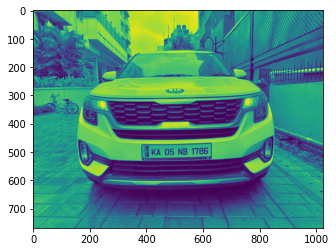

In [280]:
plt.imshow(gray)

Applying filter and finding edges for localization

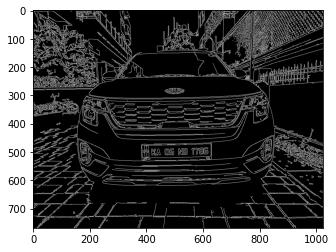

In [281]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection using canny algorithm
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Find Contours and apply mask

In [282]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #returning top10 contours

In [283]:
location = None
for i in contours:
    approx = cv2.approxPolyDP(i, 5, True)
    if len(approx) == 4:
        location = approx
        break

In [284]:
print(location)

[[[628 472]]

 [[389 475]]

 [[386 518]]

 [[626 515]]]


In [285]:
mask = np.zeros(gray.shape, np.uint8) #blank mask with the shape of original image(gray)
new_image = cv2.drawContours(mask, [location], 0,255, -1) #drawing contour in the blank mask
new_image1 = cv2.bitwise_and(img, img, mask=mask) #overlaying original image with the mask

mask generated(contour)

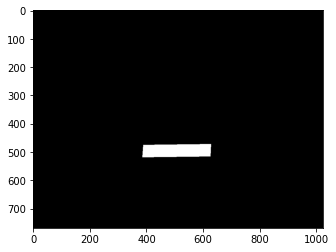

In [286]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Respective image under the mask

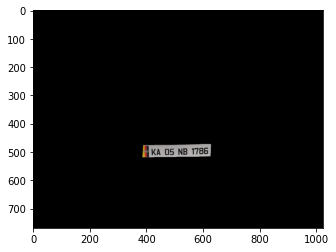

In [287]:
plt.imshow(cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB))

In [288]:
(x,y) = np.where(mask==255) #storing blacks(255) of the masks
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

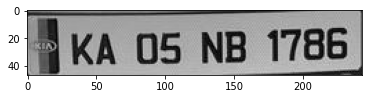

In [289]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Using Easy OCR TO Read Text

In [290]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[29, 7], [239, 7], [239, 45], [29, 45]],
  'KA 05 NB 1786',
  0.9934346290636927)]

Rendering Result

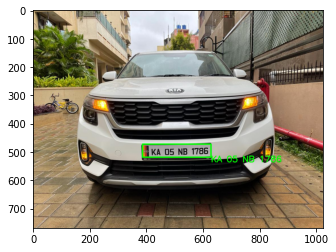

In [291]:
Number = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=Number, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Number Detected on the number plate of the car

In [292]:
Number

'KA 05 NB 1786'